In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/internship/Levine_32dim.csv'
df = pd.read_csv(dataset_path)
df.head(4)

<ipython-input-4-5a42c5ff496d>:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,...,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,label,individual,
0,2693.0,22,4.391057,4.617262,0.162691,-0.029585,-0.006696,0.066388,-0.009184,0.363602,...,0.853505,1.664480,-0.005376,-0.001961,0.648429,3.627711,307,1,1,
1,3736.0,35,4.340481,4.816692,0.701348,-0.038280,-0.016654,0.074409,0.808031,-0.035424,...,0.197818,0.491592,0.144814,0.868014,0.561384,3.627711,545,1,1,
2,7015.0,32,3.838727,4.386369,0.603568,-0.032216,0.073855,-0.042977,-0.001881,-0.008781,...,2.586670,1.308337,-0.010961,-0.010413,0.643337,3.627711,1726,1,1,
3,7099.0,29,4.255805,4.830048,0.433747,-0.027611,-0.017661,-0.044072,0.733698,-0.019066,...,1.338669,0.140523,-0.013449,-0.026039,-0.026523,3.627711,1766,1,1,


In [ ]:
df.columns

Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual', ' '],
      dtype='object')

In [ ]:
# Rename the empty column
df = df.rename(columns={' ': 'NewColumnName'})

# Verify the new column name
print(df.columns)


Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual',
       'NewColumnName'],
      dtype='object')


In [ ]:
df = df.drop(columns=['NewColumnName'])

# Verify the column is removed
print(df.columns)

Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd

# Load dataset
# df = pd.read_csv('your_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Define label column
label_column = 'label'

# Replace non-standard NaN values
df[label_column] = df[label_column].replace(['NaN', '', ' '], np.nan)

# Convert to numeric if applicable
df[label_column] = pd.to_numeric(df[label_column], errors='coerce')



In [ ]:
 df.isnull().sum()


,0
Time,0
Cell_length,0
DNA1,0
DNA2,0
CD45RA,0
CD133,0
CD19,0
CD22,0
CD11b,0
CD4,0


In [ ]:
df = df.drop(columns=['Time','file_number', 'event_number'])

len(df.columns)


38

In [ ]:
import numpy as np
import pandas as pd

def create_corrupted_data(data, keep_probability=0.4):
    print("Original Data (x):\n", data)

    m = np.random.binomial(1, keep_probability, size=data.shape)
    print("\nBinary Mask (m):\n", m)

    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = data.iloc[shuffled_rows].reset_index(drop=True)
    print("\nShuffled Data (x_shuffled):\n", x_shuffled)


    x_corrupted = data * (1 - m) + x_shuffled * m
    print("\nCorrupted Data (x_corrupted):\n", x_corrupted)

    return x_corrupted

# Sample data
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
})

# Call the function
corrupted_data = create_corrupted_data(data, keep_probability=0.6)


Original Data (x):
    A   B   C   D
0  1   6  11  16
1  2   7  12  17
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20

Binary Mask (m):
 [[0 1 0 1]
 [0 0 1 1]
 [1 1 0 1]
 [1 0 1 1]
 [1 1 1 1]]

Shuffled Data (x_shuffled):
    A   B   C   D
0  3   8  13  18
1  4   9  14  19
2  2   7  12  17
3  1   6  11  16
4  5  10  15  20

Corrupted Data (x_corrupted):
    A   B   C   D
0  1   8  11  18
1  2   7  14  19
2  2   7  13  17
3  1   9  11  16
4  5  10  15  20


In [ ]:
corrupted_data = create_corrupted_data(df, keep_probability=0.4)

corrupted_data.head()

Original Data (x):
         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0                22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1                35  4.340481  4.816692  0.701348 -0.038280 -0.016654   
2                32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3                29  4.255805  4.830048  0.433747 -0.027611 -0.017661   
4                25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...             ...       ...       ...       ...       ...       ...   
265621           60  6.733888  7.179924  1.901087 -0.054719  3.127012   
265622           41  6.826629  7.133022  1.474081 -0.019174 -0.055620   
265623           45  6.787791  7.154027  0.116755 -0.056213 -0.008864   
265624           41  6.889866  7.141219  0.684921 -0.006264 -0.026111   
265625           39  6.865218  7.144353  0.288761 -0.011310 -0.048786   

            CD22     CD11b       CD4       CD8  ...       CD3      CD61  \
0       0.066388 -0.009184  

,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,CD8,...,CD3,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,label,individual
0,22,3.458052,4.617262,0.162691,-0.029585,-0.006696,0.066388,-0.009184,0.363602,0.520195,...,-0.032596,-0.030772,0.053050,0.853505,1.664480,-0.005376,-0.001961,0.648429,NaN,1
1,13,4.340481,4.816692,0.232083,-0.038280,-0.016654,0.074409,0.808031,-0.035424,-0.010551,...,4.438740,1.258437,0.089660,1.382354,-0.028302,0.144814,-0.023749,0.561384,7.0,1
2,32,3.838727,4.386369,0.603568,-0.032216,0.073855,-0.033128,-0.001881,-0.008781,0.457607,...,0.320792,0.257137,0.046222,2.586670,1.308337,-0.010961,-0.010413,0.643337,1.0,1
3,37,4.255805,4.830048,0.433747,-0.027611,-0.017661,0.087299,-0.010134,-0.019066,0.008532,...,0.060443,-0.041140,0.108221,1.135765,0.140523,-0.013449,-0.026039,1.104122,7.0,1
4,20,2.981948,4.506433,-0.008809,-0.030297,0.080423,0.495791,0.531853,0.552746,0.031310,...,0.137186,0.056932,-0.006223,1.281598,2.076531,0.081811,-0.040488,0.283287,1.0,1


In [ ]:
keep_probability=0.4
df_corrupted = np.random.binomial(1, keep_probability, size=df.shape)
print("\nBinary Mask (m):\n", df_corrupted)
mask_new = 1*(df!=df_corrupted)
print("\n New Binary Mask (m):\n",mask_new)


Binary Mask (m):
 [[1 0 1 ... 0 1 0]
 [0 1 1 ... 1 1 0]
 [0 0 1 ... 0 1 1]
 ...
 [0 1 1 ... 0 0 0]
 [1 0 1 ... 0 1 0]
 [0 1 1 ... 0 1 0]]

 New Binary Mask (m):
         Cell_length  DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  \
0                 1     1     1       1      1     1     1      1    1    1   
1                 1     1     1       1      1     1     1      1    1    1   
2                 1     1     1       1      1     1     1      1    1    1   
3                 1     1     1       1      1     1     1      1    1    1   
4                 1     1     1       1      1     1     1      1    1    1   
...             ...   ...   ...     ...    ...   ...   ...    ...  ...  ...   
265621            1     1     1       1      1     1     1      1    1    1   
265622            1     1     1       1      1     1     1      1    1    1   
265623            1     1     1       1      1     1     1      1    1    1   
265624            1     1     1       1      1 

In [ ]:

df_labeled = df[df['label'].notna()]
df_unlabeled = df[df['label'].isna()]


x_labeled = df_labeled.drop(columns=['label'])
y_labeled = df_labeled['label']

x_unlabeled = df_unlabeled.drop(columns=['label'])
#y_unlabeled = df_unlabeled['label']


print("Labeled Features (x_labeled):\n", x_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nLabeled Target (y_labeled):\n", y_labeled)

#print("\nUnlabeled Target (y_unlabeled):\n", y_unlabeled)


Labeled Features (x_labeled):
         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0                22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1                35  4.340481  4.816692  0.701348 -0.038280 -0.016654   
2                32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3                29  4.255805  4.830048  0.433747 -0.027611 -0.017661   
4                25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...             ...       ...       ...       ...       ...       ...   
104179           58  6.827981  7.249403 -0.000106 -0.030641  1.432347   
104180           55  6.683204  7.166172  0.692668 -0.037335  1.639063   
104181           40  6.911546  7.152603 -0.036795 -0.014477  1.637975   
104182           48  6.700332  7.100771  0.308817  0.075762  1.455130   
104183           64  6.559460  7.080928  0.519572  0.097257  1.346523   

            CD22     CD11b       CD4       CD8  ...      CD13       CD3  \
0       0.066388 

In [ ]:
from sklearn.model_selection import train_test_split

# Split labeled data into training (70%) and testing (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display the results

print("Training Features (x_train):\n", x_train.shape)
print("\nTraining Target (y_train):\n", y_train.shape)
print("\nTesting Features (x_test):\n", x_test.shape)
print("\nTesting Target (y_test):\n", y_test.shape)

print("Training Features (x_train):\n", x_train)
print("\nTraining Target (y_train):\n", y_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTesting Target (y_test):\n", y_test)



Training Features (x_train):
 (72928, 37)

Training Target (y_train):
 (72928,)

Testing Features (x_test):
 (31256, 37)

Testing Target (y_test):
 (31256,)
Training Features (x_train):
         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
64113            25  3.899656  4.594272  0.976652  0.302811  0.154761   
82744            31  6.592998  6.901888  0.431481 -0.052898 -0.037690   
24294            41  3.543583  4.467671  0.377192  0.219081  0.245478   
7820             38  4.305227  4.881685  0.199351  0.100678 -0.025812   
43295            26  4.159271  4.861015  0.831285  0.191518  2.002712   
...             ...       ...       ...       ...       ...       ...   
54886            15  4.074604  4.747052  0.431805  0.228761 -0.011434   
76820            33  6.584427  6.882117  0.640424 -0.044057 -0.013737   
103694           43  6.719895  7.080995  0.306443 -0.026339  2.074008   
860              26  3.886782  4.886936  0.060176  0.233401 -0.020592   
15795     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

def logistic_with_loss(x_train, y_train, x_test, y_test):

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    log_reg = LogisticRegression(random_state=42, max_iter=500)
    log_reg.fit(x_train_scaled, y_train)


    probabilities = log_reg.predict_proba(x_test_scaled)


    loss = log_loss(y_test, probabilities)

    return probabilities, loss


log_reg_probs, log_reg_loss = logistic_with_loss(x_train, y_train, x_test, y_test)


print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression \n", log_reg_loss)


Logistic Regression Probabilities:
 [[6.97879996e-14 2.30471680e-16 9.95821434e-15 ... 7.87698185e-12
  7.68285302e-11 7.94054090e-11]
 [5.98157732e-19 2.54699819e-15 9.34033286e-18 ... 9.89232743e-12
  4.79967944e-05 2.00141686e-09]
 [5.98329031e-14 2.54893459e-11 1.84899777e-15 ... 5.46385491e-15
  2.20235923e-07 2.96114539e-12]
 ...
 [1.04316182e-10 1.32767320e-05 8.77117123e-10 ... 1.22706295e-10
  3.03118203e-11 6.50459348e-10]
 [2.76995454e-15 2.79284183e-11 4.80041035e-13 ... 1.66559468e-15
  8.94665826e-08 6.68765775e-09]
 [3.74128775e-12 7.26246686e-08 2.59726314e-12 ... 7.32231638e-17
  9.16585039e-09 9.40158294e-14]]

Logistic Regression 
 0.012343924517084753


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def xgboost_with_loss(x_train, y_train, x_test, y_test):

    y_train_adjusted = y_train - 1
    y_test_adjusted = y_test - 1


    xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)
    xgb_clf.fit(x_train, y_train_adjusted)


    probabilities = xgb_clf.predict_proba(x_test)
    loss = log_loss(y_test_adjusted, probabilities)

    return probabilities, loss

xgb_probs, xgb_log_loss = xgboost_with_loss(x_train, y_train, x_test, y_test)

# Displaying the results
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)



XGBoost Probabilities:
 [[5.1860439e-07 5.7017002e-07 3.9342234e-07 ... 8.7231638e-07
  7.8322529e-07 5.8524296e-07]
 [8.1559443e-07 1.7004106e-06 6.5709958e-07 ... 1.0578590e-06
  1.6773043e-05 2.0757868e-06]
 [5.4707510e-07 7.7939086e-07 5.7252436e-07 ... 1.0011939e-06
  4.1819862e-06 9.0937459e-07]
 ...
 [7.2769092e-07 3.8095675e-06 7.3217876e-07 ... 6.5145679e-07
  5.3072574e-07 4.8228475e-07]
 [2.6380076e-06 2.8987354e-06 2.4175074e-06 ... 4.4621897e-06
  1.0261622e-05 3.1510957e-05]
 [8.4509293e-07 7.6321942e-07 6.7003754e-07 ... 7.0236740e-07
  3.7610098e-06 9.6112626e-07]]

XGBoost Log Loss:
 0.00400363072165128


In [ ]:
import numpy as np
import pandas as pd

def binary_mask(p_m, x_unlabeled):

    mask = np.random.binomial(1, p_m, size=x_unlabeled.shape)
    return mask

def corruption(mask, x_unlabeled):

    num_rows = x_unlabeled.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = x_unlabeled.iloc[shuffled_rows].reset_index(drop=True)


    x_corrupted = x_unlabeled * (1 - mask) + x_shuffled * mask
    return x_corrupted


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    dimension = x_unlabeled.shape[1]

    input_layer = Input(shape=(dimension,))

    # Hidden layer
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Mask estimation output
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Feature estimation output
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Define the model
    model = Model(inputs=input_layer, outputs=[output1, output2])

    model.compile(
        optimizer='rmsprop',
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha}
    )

    # Ensure data is in the form of NumPy arrays
    x_unlabeled_np = x_unlabeled.to_numpy() if isinstance(x_unlabeled, pd.DataFrame) else x_unlabeled
    corruption_binary_mask = binary_mask(p_m, x_unlabeled_np)
    corrupted_data = corruption(corruption_binary_mask, pd.DataFrame(x_unlabeled_np)).to_numpy()

    # Train the model with correct output names
    model.fit(
        corrupted_data,
        {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled_np},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model

# Scale the unlabeled data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.5  # Masking probability
alpha = 1.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50               # Number of epochs for training
}

# Run self-supervised training
encoder, model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


Epoch 1/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: 0.7104 - loss: 1.6753 - mask_estimation_loss: 0.9649
Epoch 2/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6954 - loss: 1.5387 - mask_estimation_loss: 0.8434
Epoch 3/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6941 - loss: 1.5271 - mask_estimation_loss: 0.8330
Epoch 4/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6939 - loss: 1.5217 - mask_estimation_loss: 0.8278
Epoch 5/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6938 - loss: 1.5217 - mask_estimation_loss: 0.8278
Epoch 6/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6938 - loss: 1.5211 - mask_estimation_loss: 0.8273
Epoch 7/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6938 - loss: 1.5201 - mask_estimation_loss: 0.8263
Epoch 8/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - featur

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 37)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 37)             │          1,406 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 37)             │          1,406 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 37)             │          1,406 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,438 (32.96 KB)

 Trainable params: 4,218 (16.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,220 (16.49 KB)

In [ ]:
encoder_path = '/content/drive/My Drive/internship/encoder_model.keras'
encoder.save(encoder_path)

In [ ]:
from keras.models import load_model
encoder = load_model(encoder_path)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x_train and x_test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Use the encoder model to transform (encode) the scaled data
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)


2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Logistic Regression on Encoded Data
log_reg_probs, log_reg_loss = logistic_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression Log Loss:\n", log_reg_loss)

# XGBoost on Encoded Data
xgb_probs, xgb_log_loss = xgboost_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)

Logistic Regression Probabilities:
 [[6.45051607e-12 6.11020307e-10 6.21775921e-11 ... 1.88359400e-08
  2.10524883e-06 1.11990395e-10]
 [2.08123031e-13 1.93177530e-12 2.36952851e-10 ... 1.77193249e-09
  5.77330405e-04 6.52569806e-08]
 [4.49396635e-12 7.29398963e-09 1.19761135e-09 ... 1.08179953e-12
  7.88247715e-07 2.50646145e-10]
 ...
 [9.67758903e-13 3.82038103e-05 8.11496454e-14 ... 1.70351950e-16
  2.82784039e-13 4.99848737e-15]
 [1.79211113e-16 1.20135309e-11 7.08814298e-13 ... 1.79915537e-13
  3.28764321e-07 3.50606458e-09]
 [1.19112702e-11 2.41467538e-07 2.90562803e-09 ... 6.15560765e-14
  1.25151182e-07 5.52680212e-12]]

Logistic Regression Log Loss:
 0.02190679209469649

XGBoost Probabilities:
 [[1.19279412e-06 6.68580867e-07 1.20172172e-06 ... 1.33743276e-06
  1.78690289e-06 3.89016549e-07]
 [2.81810514e-07 3.28466103e-06 1.29136436e-06 ... 6.32747174e-07
  1.33583526e-04 8.02747593e-07]
 [5.95398681e-08 4.58751487e-07 4.15879526e-07 ... 1.27853184e-07
  1.40035650e-06 1.5257

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout,Activation
from tensorflow.keras.models import Model
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):

  #inputs -> takes input dimension as arguement
  inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_1')(inputs) # dense layer 1
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_2')(x) # dense layer 2
  y_logit = Dense(label_dimension, activation = None, name = 'model_logit_output')(x) # logit output
  y = Activation('softmax', name = 'model_output')(y_logit) # actual prediction
  model = Model(inputs = inputs , outputs = [y_logit,y],name="model") # model creation
  return model




In [ ]:
# Define corruption function (applies mask to data)
def corruption(mask, data):
    # Shuffle rows in the data (for NumPy array)
    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    data_shuffled = data[shuffled_rows]
    corrupted_data = data * (1 - mask) + data_shuffled * mask
    return mask, corrupted_data

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Define the model
def custom_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')  # Fix: Ensure shape is a tuple
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = Activation('softmax', name='model_output')(y_logit)
    return Model(inputs=inputs, outputs=[y_logit, y], name="custom_model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data
        y_logit, y_pred = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_pred)

        # Unlabeled data
        unlabeled_y_logit, unlabeled_y_pred = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    x_train, y_train, x_unlabeled, x_test = map(np.array, [x_train, y_train, x_unlabeled, x_test])

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]

    # Input and label dimensions
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map labels if necessary
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        unique_classes = np.unique(y_train)
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
        y_train = np.vectorize(class_mapping.get)(y_train)
    else:
        class_mapping = None

    # Split train-validation
    indices = np.random.permutation(len(x_train))
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]

    x_train_split, y_train_split = x_train[train_idx], y_train[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train[valid_idx]

    # Load encoder and encode data
    encoder = load_model(encoder_path)
    x_train_encoded = encoder.predict(x_train_split)
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)

    # Model instance
    model = custom_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension,
    )

    optimizer = Adam()
    supv_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    # Training loop
    for epoch in range(epochs):
        # Batch sampling
        batch_idx = np.random.choice(len(x_train_encoded), batch_size, replace=False)
        batch_x = x_train_encoded[batch_idx]
        batch_y = y_train_split[batch_idx]

        # Unlabeled data processing
        batch_unlabeled_idx = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_idx]
        batch_unlabeled_x_shuffled = [
            encoder.predict(batch_unlabeled_x * np.random.binomial(1, mask_probability, batch_unlabeled_x.shape))
            for _ in range(K)
        ]
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        # Train step
        total_loss = train(batch_x, batch_y, batch_unlabeled_x_shuffled, model, beta, supv_loss_fn, optimizer)

        if epoch % 100 == 0:
            y_valid_logit, y_valid_pred = model(x_valid_encoded, training=False)
            valid_loss = supv_loss_fn(y_valid_split, y_valid_pred)
            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss:.4f}, Total Loss: {total_loss:.4f}")

    # Test predictions
    y_test_logit, y_test_pred = model(x_test_encoded, training=False)
    return y_test_logit, model

# Example parameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {'hidden_dimension': 100, 'batch_size': 128, 'epochs': 1000}

# Call the semi_supervised function
y_test_logit, trained_model = semi_supervised(
    x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path='/content/drive/My Drive/internship/encoder_model.keras'
)


2052/2052 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 0/1000, Validation Loss: 5.8478, Total Loss: 6.9883
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━

In [ ]:
print(len(y_test))
print(np.array(y_test))

31256
[10.  9.  9. ...  8.  9.  9.]


In [ ]:
print(len(y_test_logit))
print(np.array(y_test_logit))

31256
[[ -1.3939805   -2.5025969   -7.074447   ...  -2.7663834   -3.5070605
   -7.745824  ]
 [-10.82338     -1.6714407   -6.6827507  ...  -1.5172       8.947588
    2.2819302 ]
 [ -8.386008     0.51951253  -4.226745   ...  -1.2129881    3.6620653
   -1.760032  ]
 ...
 [ -1.0133454    6.95021     -1.0712498  ...  -7.6825037   -8.191979
  -13.342984  ]
 [ -8.5181675   -2.1127634   -8.902862   ...  -4.0080905    1.402843
   -0.5464263 ]
 [ -8.20672      1.1535176   -5.3797326  ...  -2.4053223    0.9485494
   -4.299256  ]]


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


def perf_metric(metric, y_test, y_test_logit):
    # Ensure y_test and y_test_logit have matching sample sizes
    if len(y_test) != len(y_test_logit):
        raise ValueError(f"Shape mismatch: y_test has {len(y_test)} samples, but y_test_logit has {len(y_test_logit)} samples.")

    # Convert logits to probabilities
    if y_test_logit.shape[1] == 1:  # Binary classification
        y_test_hat_prob = tf.sigmoid(y_test_logit).numpy()
    elif y_test_logit.shape[1] > 1:  # Multiclass classification
        y_test_hat_prob = tf.nn.softmax(y_test_logit, axis=1).numpy()
    else:
        raise ValueError("Invalid shape for predicted logits.")

    # For Accuracy Metric
    if metric == 'acc':
        if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
            y_test = np.argmax(y_test, axis=1)
        y_pred = np.argmax(y_test_hat_prob, axis=1)
        print("Y_test",y_test[0:5])
        print("y_pred",y_pred[0:5]+1) # Predicted class labels
        return accuracy_score(y_test, y_pred+1)

    # For AUROC Metric
    elif metric == 'auc':
        if len(np.unique(y_test)) == 2:  # Binary classification
            if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
                y_test = np.argmax(y_test, axis=1)
            return roc_auc_score(y_test, y_test_hat_prob[:, 1])
        elif len(np.unique(y_test)) > 2:  # Multiclass classification
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encode y_test
            return roc_auc_score(y_test_bin, y_test_hat_prob, average='macro', multi_class='ovr')
        else:
            raise ValueError("Invalid shape or values for ground truth labels.")

    else:
        raise ValueError(f"Unsupported metric: {metric}. Choose either 'acc' or 'auc'.")


In [ ]:
y_test=np.array(y_test)
y_test_logit=np.array(y_test_logit)
# Calculate Accuracy
accuracy = perf_metric('acc', y_test, y_test_logit)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUROC
auroc = perf_metric('auc', y_test, y_test_logit)
print(f"AUROC: {auroc:.4f}")

Y_test [10.  9.  9.  2. 10.]
y_pred [10  9  9  2 10]
Accuracy: 0.9789
AUROC: 0.9992


In [ ]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generate predictions for unlabeled data using an encoder and predictor.

    Parameters:
    - x_unlab: Unlabeled feature data.
    - encoder: Pretrained encoder model to encode features.
    - predictor: Trained classification model.

    Returns:
    - y_unlab_pred: Predicted labels for unlabeled data.
    """
    # Encode unlabeled data
    x_unlab_encoded = encoder.predict(x_unlab)

    # Predict with the classifier
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert probabilities to predicted class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

# Generate predictions for the unlabeled data
y_unlab_pred = generate_unlabeled_predictions(x_unlabeled, encoder, trained_model)
print(f"Predicted Labels for Unlabeled Data:\n{y_unlab_pred}")



5046/5046 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Predicted Labels for Unlabeled Data:
[9 6 9 ... 6 6 9]


In [ ]:
print(y_unlab_pred[0:10])

[ 9  6  9  6  9  9 12  7 12  7]


In [ ]:
!pip install openTSNE


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.8 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()
x_labeled_scale = scaler.fit_transform(x_labeled)


<ipython-input-43-7a7a21d76c6b>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors


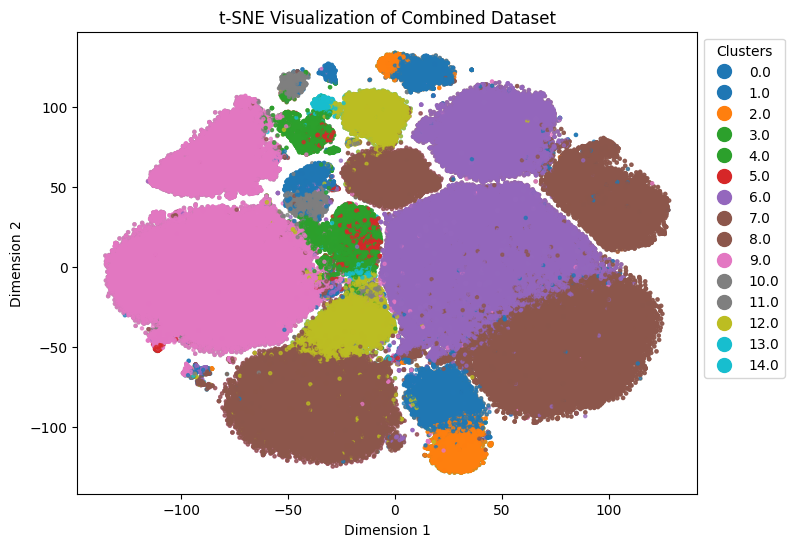

In [ ]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(x_labeled, y_labeled, x_unlabeled, y_unlab_pred):
    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization with distinct cluster colors
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    # Ensure labels are integers for discrete colormap
    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}

    # Map each label to a discrete color index
    discrete_colors = np.array([label_to_color[label] for label in labels])

    # Generate a discrete colormap
    cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=discrete_colors, cmap=cmap, s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10) for idx in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled_scale,
    y_labeled=y_labeled.to_numpy(),
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot with distinct cluster colors
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


In [ ]:
pip install openTSNE

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset_path = '/content/drive/My Drive/internship/Levine_32dim.csv'
df = pd.read_csv(dataset_path)
df.head(4)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/internship/Levine_32dim.csv'

In [ ]:
df.columns

Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual', ' '],
      dtype='object')

In [ ]:
df = df.rename(columns={' ': 'NewColumnName'})

# Verify the new column name
print(df.columns)

Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual',
       'NewColumnName'],
      dtype='object')


In [ ]:
df = df.drop(columns=['NewColumnName'])

# Verify the column is removed
print(df.columns)


Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual'],
      dtype='object')


In [ ]:
df = df.drop(columns=['Time','file_number', 'event_number'])

len(df.columns)

NameError: name 'df' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Load dataset
# df = pd.read_csv('your_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Define label column
label_column = 'label'

# Replace non-standard NaN values
df[label_column] = df[label_column].replace(['NaN', '', ' '], np.nan)

# Convert to numeric if applicable
df[label_column] = pd.to_numeric(df[label_column], errors='coerce')

# Separate labeled and unlabeled data
label_df = df[df[label_column].notnull()]
unlabeled_df = df[df[label_column].isnull()]

x_labeled = label_df.drop(columns=[label_column])
y_labeled = label_df[label_column]

x_unlabeled = unlabeled_df.drop(columns=[label_column])

# Display results
print("Shape of labeled features (x_labeled):", x_labeled.shape)
print("Shape of labeled labels (y_labeled):", y_labeled.shape)
print("Shape of unlabeled features (x_unlabeled):", x_unlabeled.shape)

Shape of labeled features (x_labeled): (104184, 40)
Shape of labeled labels (y_labeled): (104184,)
Shape of unlabeled features (x_unlabeled): (161442, 40)


38